# imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import analysis_util
sns.set_theme()

In [2]:
subreddits = ['FourSentenceStories','Trump666','GraphTheory','jazznoir','indoorbouldering','kiwi_bird','DTU']
period = '2015-01-01-2022-01-01'

df_post_dict = {}

for subreddit in subreddits:    
    path_post='../data/raw/'+ subreddit +'_'+  period +'/'+ subreddit + "_posts.csv"
    path_awards = '../data/raw/'+ subreddit +'_'+  period +'/'+ subreddit + "_awards.csv"
    df_post=analysis_util.read_posts(path_post,path_awards)
    df_post['n_awards'] = df_post['n_awards'].fillna(0)
    df_post['n_awards'] = df_post['n_awards'].astype(int)
    df_post['awarded'] = df_post['n_awards'].apply(lambda x: 1 if x > 0 else 0)
    df_post['award_count'] = df_post['n_awards']
    df_post_dict[subreddit] = df_post

Removed 0.008264462809917328 of the rows
Removed 0.023008849557522026 of the rows
Removed 0.046391752577319645 of the rows
Removed 0.056192660550458795 of the rows
Removed 0.013580246913580174 of the rows
Removed 0.01412429378531077 of the rows
Removed 0.02263374485596703 of the rows


In [3]:
# df_post_dict['FourSentenceStories'].head()

In [4]:
p = '/home/pelle/Master_Thesis/data/raw/wallstreetbets/'
df_post = pd.read_csv(p+'submissions_pmaw_2016-2021_wsb.csv',usecols=['author','created_utc','score','num_comments','title','selftext','id','award_count'])
df_post = df_post[df_post['author'] != '[deleted]']
df_post = df_post[df_post['author'] != 'AutoModerator']

In [5]:
# df_post.groupby('author').sum(numeric_only=True).sort_values(by='award_count',ascending=False).head(10)
# df_post.groupby('author').sum(numeric_only=True).sort_values(by='score',ascending=False).head(10)

# ControlTheNarrative

In [6]:
L=len(df_post.loc[df_post['author']=='ControlTheNarrative'])
df_posts_same_activity = df_post.groupby('author').filter(lambda x: len(x) == L)
group = df_posts_same_activity.groupby('author').sum(numeric_only=True)
print(L)

20


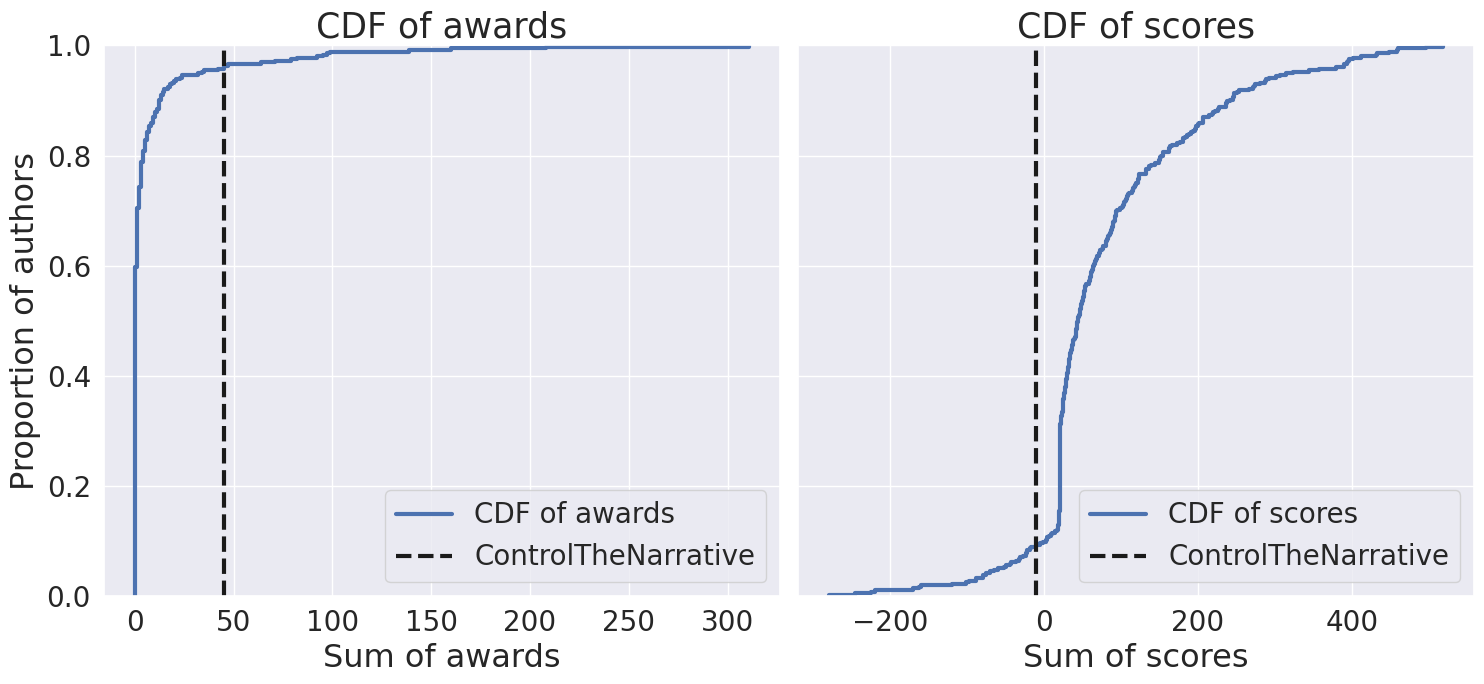

P-value Score: 0.90704
P-value Awards: 0.03662


In [7]:
# sub plot
fig, axs = plt.subplots(1, 2,figsize=(15,7),sharey=True)
sns.ecdfplot(group['award_count'],stat='proportion',label='CDF of awards',linewidth=3,ax=axs[0])
axs[0].axvline(group.loc['ControlTheNarrative']['award_count'], color='k', linestyle='dashed', linewidth=3,label='ControlTheNarrative')
axs[0].set_xlabel('Sum of awards',fontsize=23)
axs[0].set_ylabel('Proportion of authors',fontsize=23)
axs[0].set_title('CDF of awards',fontsize=25)
axs[0].legend(fontsize=20,loc='lower right')
axs[0].tick_params(axis='both', which='major', labelsize=20)
axs[0].tick_params(axis='both', which='minor', labelsize=20)
sns.ecdfplot(group['score'],stat='proportion',linewidth=3,label='CDF of scores',ax=axs[1])
axs[1].axvline(group.loc['ControlTheNarrative']['score'], color='k', linestyle='dashed', linewidth=3,label='ControlTheNarrative')
axs[1].set_xlabel('Sum of scores',fontsize=23)
axs[1].set_ylabel('Proportion of authors',fontsize=23)
axs[1].set_title('CDF of scores',fontsize=25)
axs[1].legend(fontsize=20,loc='lower right')
axs[1].tick_params(axis='both', which='major', labelsize=20)
axs[1].tick_params(axis='both', which='minor', labelsize=20)
plt.tight_layout()
plt.savefig('/home/pelle/Master_Thesis/reports/figures/controlthenarrative_rep.png',dpi=250)
plt.show()

p_value = np.array(np.array(group['score']) > group.loc['ControlTheNarrative']['score']).sum() / len(group['score'])
print('P-value Score: '+str(p_value.round(5)))

p_value = np.array(np.array(group['award_count']) > group.loc['ControlTheNarrative']['award_count']).sum() / len(group['award_count'])
print('P-value Awards: '+str(p_value.round(5)))

# DeepFuckingValue

In [8]:
L=len(df_post.loc[df_post['author']=='DeepFuckingValue'])
df_posts_same_activity = df_post.groupby('author').filter(lambda x: len(x) == L)
group = df_posts_same_activity.groupby('author').sum(numeric_only=True)
print(L)

57


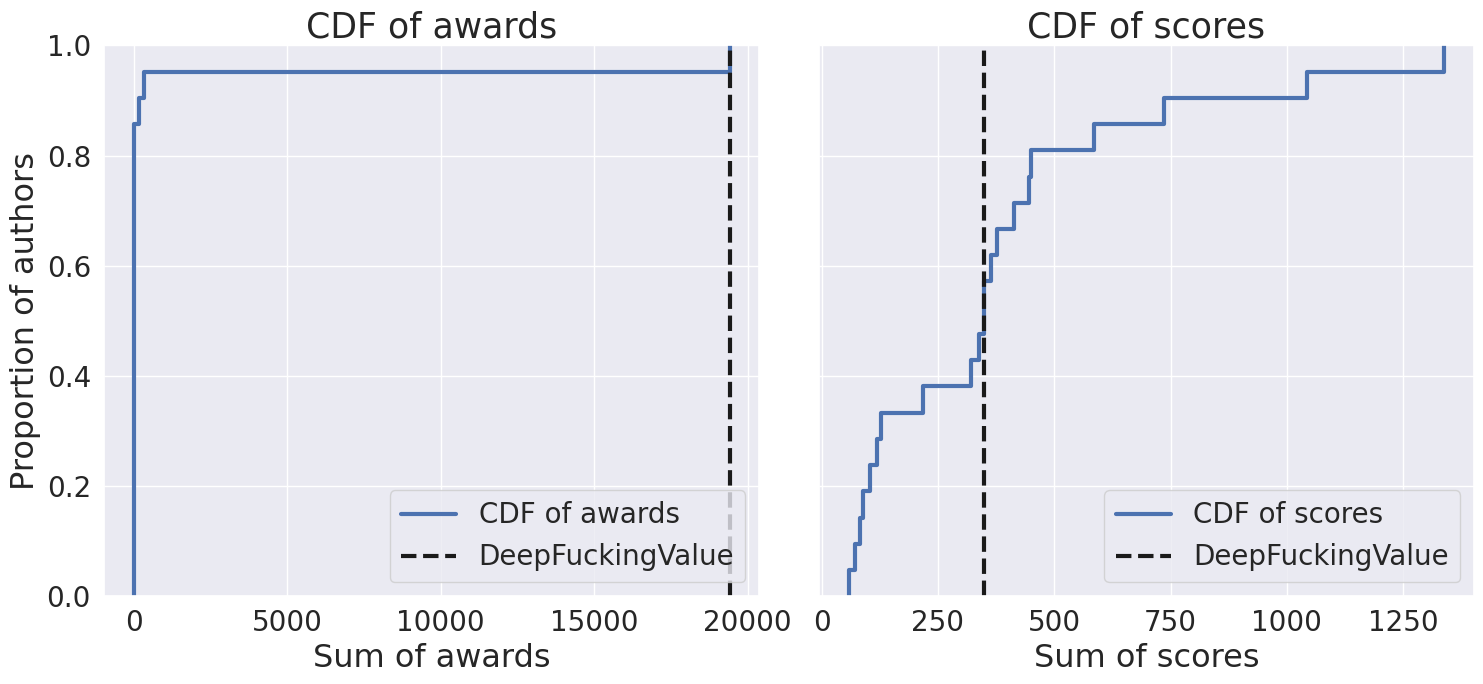

P-value Score: 0.42857
P-value Awards: 0.0


In [9]:
# sub plot
fig, axs = plt.subplots(1, 2,figsize=(15,7),sharey=True)
sns.ecdfplot(group['award_count'],stat='proportion',label='CDF of awards',linewidth=3,ax=axs[0])
axs[0].axvline(group.loc['DeepFuckingValue']['award_count'], color='k', linestyle='dashed', linewidth=3,label='DeepFuckingValue')
axs[0].set_xlabel('Sum of awards',fontsize=23)
axs[0].set_ylabel('Proportion of authors',fontsize=23)
axs[0].set_title('CDF of awards',fontsize=25)
axs[0].legend(fontsize=20,loc='lower right')
axs[0].tick_params(axis='both', which='major', labelsize=20)
axs[0].tick_params(axis='both', which='minor', labelsize=20)
sns.ecdfplot(group['score'],stat='proportion',linewidth=3,label='CDF of scores',ax=axs[1])
axs[1].axvline(group.loc['DeepFuckingValue']['score'], color='k', linestyle='dashed', linewidth=3,label='DeepFuckingValue')
axs[1].set_xlabel('Sum of scores',fontsize=23)
axs[1].set_ylabel('Proportion of authors',fontsize=23)
axs[1].set_title('CDF of scores',fontsize=25)
axs[1].legend(fontsize=20,loc='lower right')
axs[1].tick_params(axis='both', which='major', labelsize=20)
axs[1].tick_params(axis='both', which='minor', labelsize=20)
plt.tight_layout()
plt.savefig('/home/pelle/Master_Thesis/reports/figures/DeepFuckingValue_rep.png',dpi=250)
plt.show()

p_value = np.array(np.array(group['score']) > group.loc['DeepFuckingValue']['score']).sum() / len(group['score'])
print('P-value Score: '+str(p_value.round(5)))

p_value = np.array(np.array(group['award_count']) > group.loc['DeepFuckingValue']['award_count']).sum() / len(group['award_count'])
print('P-value Awards: '+str(p_value.round(5)))

# 1RONYMAN

In [10]:
L=len(df_post.loc[df_post['author']=='1R0NYMAN'])
df_posts_same_activity = df_post.groupby('author').filter(lambda x: len(x) == L)
group = df_posts_same_activity.groupby('author').sum(numeric_only=True)
print(L)

10


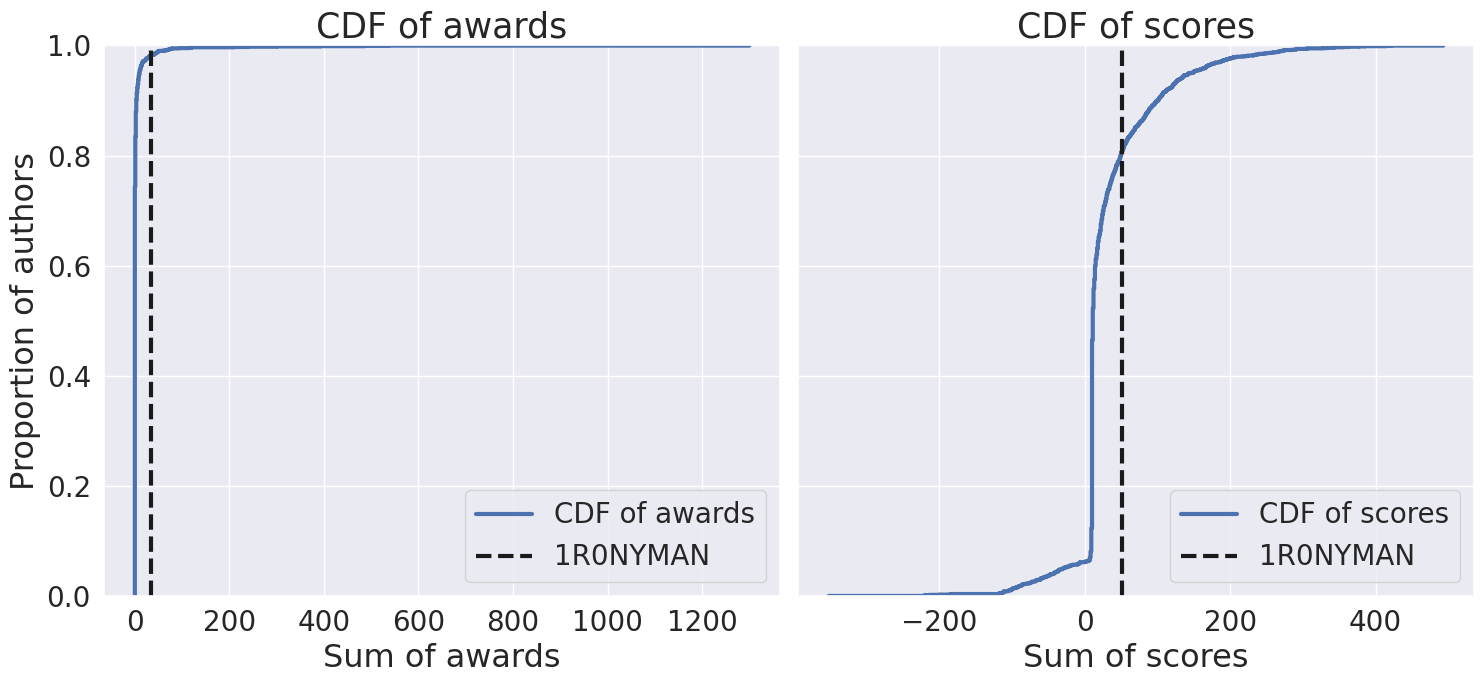

P-value Score: 0.19196
P-value Awards: 0.01809


In [11]:
# sub plot
fig, axs = plt.subplots(1, 2,figsize=(15,7),sharey=True)
sns.ecdfplot(group['award_count'],stat='proportion',label='CDF of awards',linewidth=3,ax=axs[0])
axs[0].axvline(group.loc['1R0NYMAN']['award_count'], color='k', linestyle='dashed', linewidth=3,label='1R0NYMAN')
axs[0].set_xlabel('Sum of awards',fontsize=23)
axs[0].set_ylabel('Proportion of authors',fontsize=23)
axs[0].set_title('CDF of awards',fontsize=25)
axs[0].legend(fontsize=20,loc='lower right')
axs[0].tick_params(axis='both', which='major', labelsize=20)
axs[0].tick_params(axis='both', which='minor', labelsize=20)
sns.ecdfplot(group['score'],stat='proportion',linewidth=3,label='CDF of scores',ax=axs[1])
axs[1].axvline(group.loc['1R0NYMAN']['score'], color='k', linestyle='dashed', linewidth=3,label='1R0NYMAN')
axs[1].set_xlabel('Sum of scores',fontsize=23)
axs[1].set_ylabel('Proportion of authors',fontsize=23)
axs[1].set_title('CDF of scores',fontsize=25)
axs[1].legend(fontsize=20,loc='lower right')
axs[1].tick_params(axis='both', which='major', labelsize=20)
axs[1].tick_params(axis='both', which='minor', labelsize=20)
plt.tight_layout()
plt.savefig('/home/pelle/Master_Thesis/reports/figures/1R0NYMAN_rep.png',dpi=250)
plt.show()

p_value = np.array(np.array(group['score']) > group.loc['1R0NYMAN']['score']).sum() / len(group['score'])
print('P-value Score: '+str(p_value.round(5)))

p_value = np.array(np.array(group['award_count']) > group.loc['1R0NYMAN']['award_count']).sum() / len(group['award_count'])
print('P-value Awards: '+str(p_value.round(5)))

## ALL

P-value Score ControlTheNarrative: 0.00198
P-value Score DeepFuckingValue: 0.0
P-value Score 1R0NYMAN: 0.00244


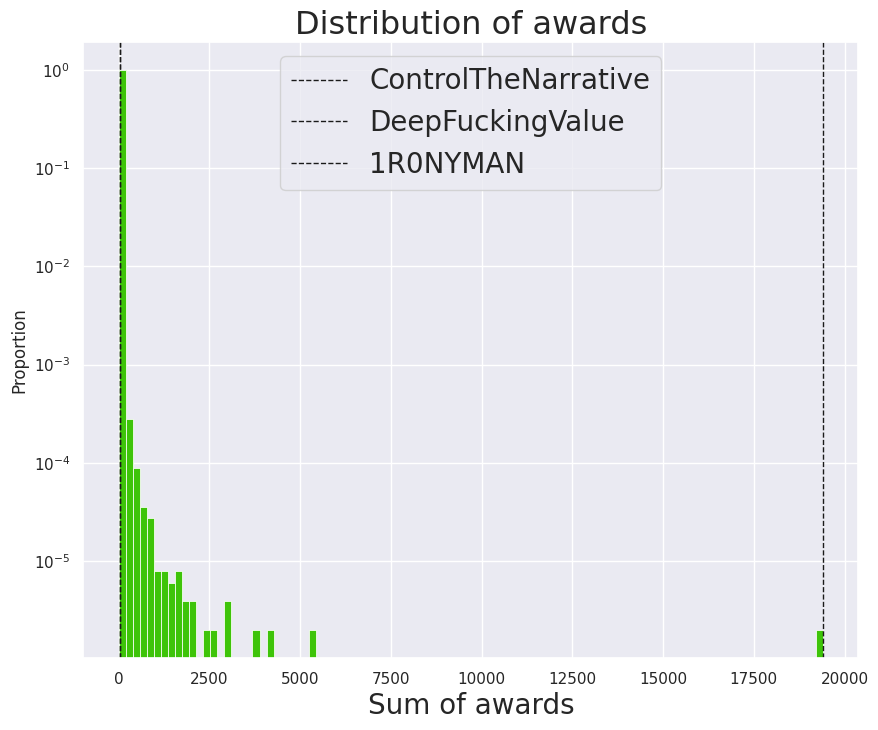

In [12]:
plt.figure(figsize=(10,8),dpi=100)
for u in ['ControlTheNarrative','DeepFuckingValue','1R0NYMAN']:
    group = df_post.groupby('author').sum(numeric_only=True)

    sns.histplot(group['award_count'],stat='proportion',color='#3cc406',bins=100)
    plt.axvline(group.loc[u]['award_count'], color='k', linestyle='dashed', linewidth=1,label=u)
    plt.xlabel('Sum of awards',fontsize=20)
    plt.yscale('log')
    plt.title('Distribution of awards',fontsize=23)

    p_value = np.array(np.array(group['award_count']) > group.loc[u]['award_count']).sum() / len(group['award_count'])
    print('P-value Score '+str(u)+': '+str(p_value.round(5)))
    
plt.legend(fontsize=20)
plt.show()

P-value Score ControlTheNarrative: 0.98984
P-value Score DeepFuckingValue: 0.00167
P-value Score 1R0NYMAN: 0.02747


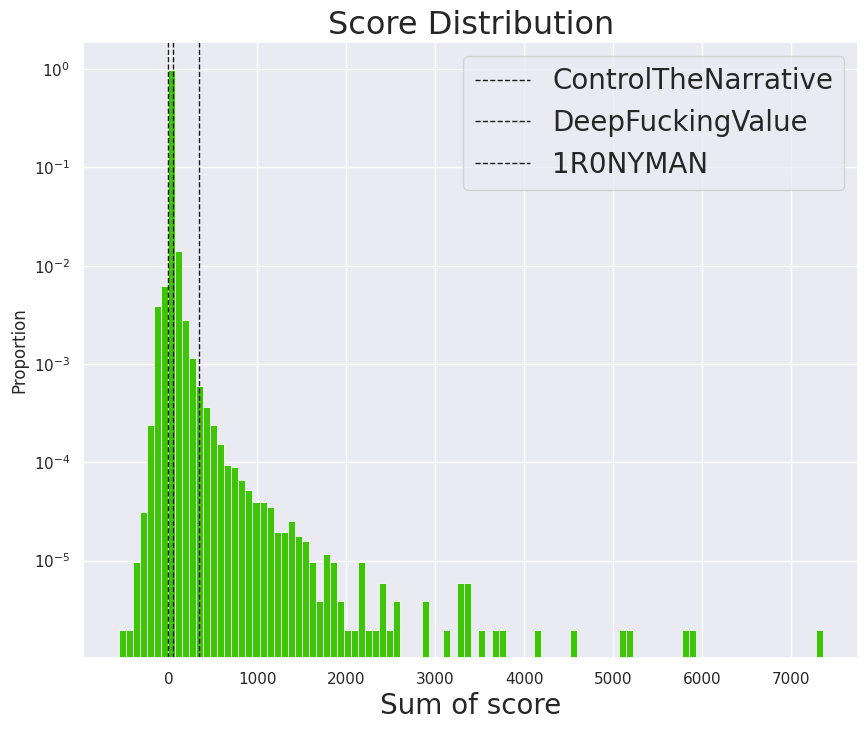

In [13]:
plt.figure(figsize=(10,8),dpi=100)
for u in ['ControlTheNarrative','DeepFuckingValue','1R0NYMAN']:
    group = df_post.groupby('author').sum(numeric_only=True)

    sns.histplot(group['score'],stat='proportion',color='#3cc406',bins=100)
    plt.axvline(group.loc[u]['score'], color='k', linestyle='dashed', linewidth=1,label=u)
    plt.xlabel('Sum of score',fontsize=20)
    plt.yscale('log')
    plt.title('Score Distribution',fontsize=23)

    p_value = np.array(np.array(group['score']) > group.loc[u]['score']).sum() / len(group['score'])
    print('P-value Score '+str(u)+': '+str(p_value.round(5)))
    
plt.legend(fontsize=20)
plt.show()

# Distribution

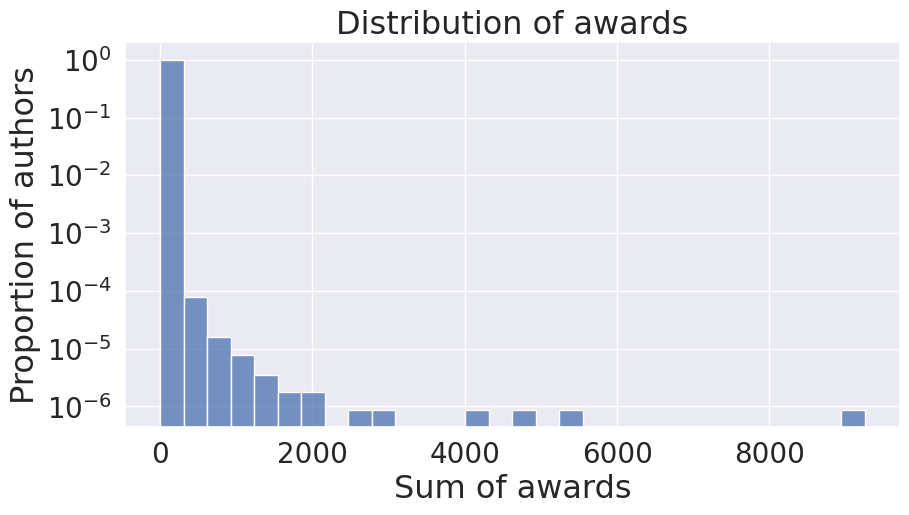

In [14]:
plt.figure(figsize=(10,5))
sns.histplot(df_post['award_count'],stat='proportion',bins=30)
plt.xlabel('Sum of awards',fontsize=23)
plt.ylabel('Proportion of authors',fontsize=23)
plt.yscale('log')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Distribution of awards',fontsize=23)

plt.savefig('/home/pelle/Master_Thesis/reports/figures/awards_dist_wsb.png',dpi=250,bbox_inches='tight')
plt.show()

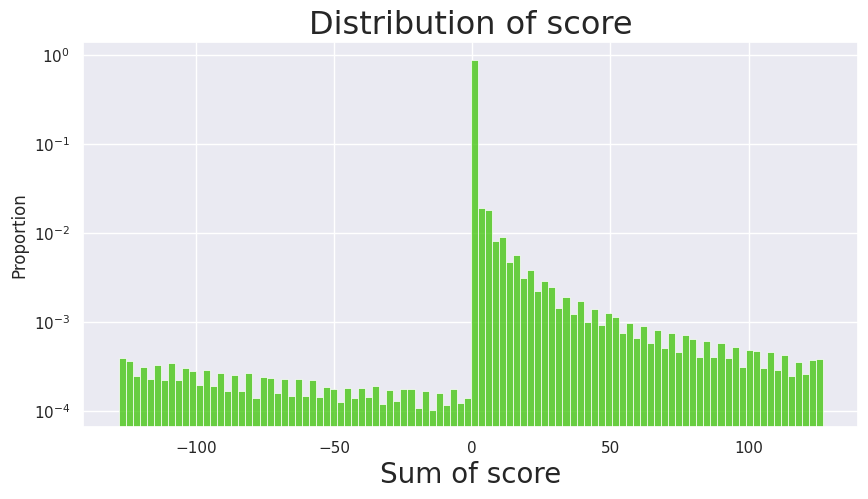

In [15]:
plt.figure(figsize=(10,5),dpi=100)
sns.histplot(df_post['score'],stat='proportion',color='#3cc406',bins=100)
plt.xlabel('Sum of score',fontsize=20)
plt.yscale('log')
plt.title('Distribution of score',fontsize=23)

plt.show()

# All Subreddits

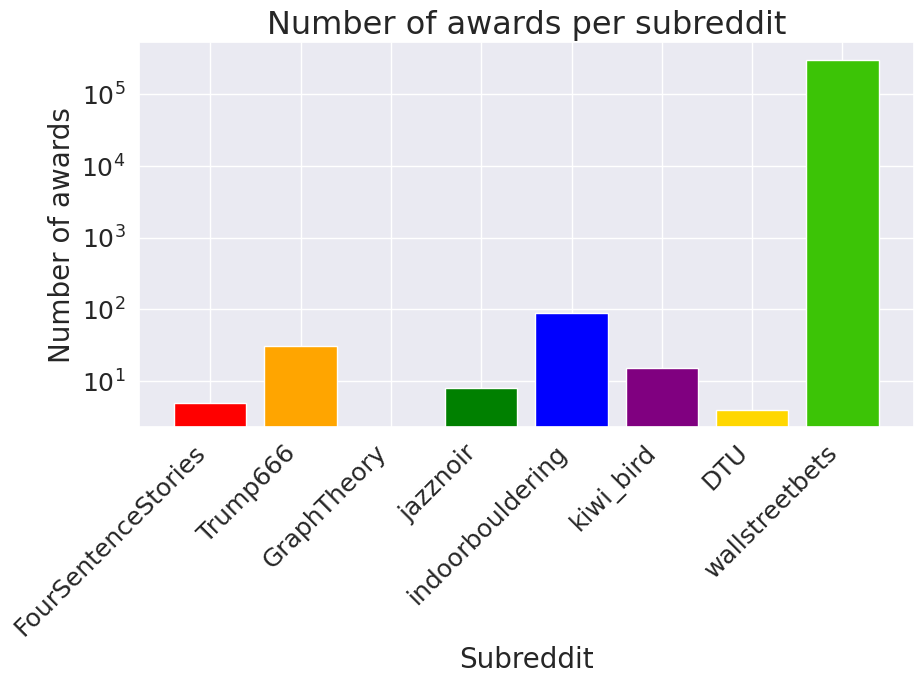

FourSentenceStories 5
Trump666 31
GraphTheory 0
jazznoir 8
indoorbouldering 88
kiwi_bird 15
DTU 4
wallstreetbets 304817.0


In [16]:
subreddits = ['FourSentenceStories','Trump666','GraphTheory','jazznoir','indoorbouldering','kiwi_bird','DTU']
n_awarded = []

for subreddit in subreddits:
    n_awarded.append(df_post_dict[subreddit]['award_count'].sum())
n_awarded.append(df_post['award_count'].sum())

# sort by number of awards
subs=subreddits+['wallstreetbets']

# a color for each subreddit in a dictionary
color_dict = {'FourSentenceStories':'#FF0000','Trump666':'#FFA500','GraphTheory':'#FF1493','jazznoir':'#008000',
              'indoorbouldering':'#0000FF','kiwi_bird':'#800080','DTU':'#FFD700','wallstreetbets': '#3cc406'}


# plot
plt.figure(figsize=(10,5))
plt.bar(subs,n_awarded,color=[color_dict[i] for i in subs])
plt.xlabel('Subreddit',fontsize=20)
plt.ylabel('Number of awards',fontsize=20)
plt.yscale('log')
plt.title('Number of awards per subreddit',fontsize=23)
plt.xticks(rotation=45,fontsize=18,ha='right')
plt.yticks(fontsize=18)
plt.savefig('/home/pelle/Master_Thesis/reports/figures/awads_subreddits.png',dpi=250, bbox_inches='tight')
plt.show()

for subreddit in subreddits:
    print(subreddit, df_post_dict[subreddit]['award_count'].sum())
print('wallstreetbets', df_post['award_count'].sum())